# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
def extract_lat_lng_via_city_name(city_name):
    lat, lng = None, None
    api_key = g_key
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    endpoint = f"{base_url}?address={city_name}&key={api_key}"
    r = requests.get(endpoint)
    if r.status_code not in range(200, 299):
        return None, None
    try:
        results = r.json()['results'][0]
        lat = results['geometry']['location']['lat']
        lng = results['geometry']['location']['lng']
    except:
        pass
    return lat, lng

print("Beginning Data Retrieval")
print("--------------------------------")
city_weather = []
for idx, city in enumerate(cities):
    print(f"Processing Record {idx} | {city}")
    lat, lng = extract_lat_lng_via_city_name(city)
    if (lat == None or lng == None):
        print("City not found. Skipping...")
        continue
    endpoint = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lng}&appid={weather_api_key}"
    response = requests.get(endpoint)
    weather = response.json()
    try:
        city_weather.append({"City": city,
                             "Latitude": weather["coord"]["lat"],
                             "Longitude": weather["coord"]["lon"],
                             "Max Temp (F)": 1.8 * (weather["main"]["temp_max"] - 273) + 32,
                             "Humidity (%)": weather["main"]["humidity"],
                             "Cloudiness (%)": weather["clouds"]["all"],
                             "Wind Speed (mph)": weather["wind"]["speed"],
                             "Country": weather["sys"]["country"],
                             "Date": weather["dt"]
                            })
    except:
        print("Weather not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
--------------------------------
Processing Record 0 | namatanai
Processing Record 1 | cape town
Processing Record 2 | hermanus
Processing Record 3 | toamasina
Processing Record 4 | kapaa
Processing Record 5 | tuktoyaktuk
Processing Record 6 | mar del plata
Processing Record 7 | hobart
Processing Record 8 | ribeira grande
Processing Record 9 | saskylakh
Processing Record 10 | bayburt
Processing Record 11 | mahebourg
Processing Record 12 | moron
City not found. Skipping...
Processing Record 13 | illoqqortoormiut
Processing Record 14 | belushya guba
Weather not found. Skipping...
Processing Record 15 | saldanha
Processing Record 16 | ushuaia
Processing Record 17 | saint george
City not found. Skipping...
Processing Record 18 | arani
Processing Record 19 | luderitz
Processing Record 20 | dikson
Processing Record 21 | port elizabeth
Processing Record 22 | airai
Processing Record 23 | abu kamal
Processing Record 24 | sao filipe
Processing Record 25 | praia
Processin

Processing Record 225 | hamilton
City not found. Skipping...
Processing Record 226 | ancud
Processing Record 227 | morehead
Processing Record 228 | ottawa
Processing Record 229 | huarmey
Processing Record 230 | necochea
Processing Record 231 | oranjemund
Processing Record 232 | hilo
Processing Record 233 | castro marim
Processing Record 234 | sentyabrskiy
Processing Record 235 | flin flon
Processing Record 236 | port blair
Processing Record 237 | inhambane
Processing Record 238 | umm durman
Processing Record 239 | amderma
Processing Record 240 | zhangye
Processing Record 241 | la ronge
Processing Record 242 | morant bay
Processing Record 243 | vila velha
Processing Record 244 | chagda
Weather not found. Skipping...
Processing Record 245 | rapid valley
Processing Record 246 | wanning
Processing Record 247 | narsaq
Processing Record 248 | yar-sale
Processing Record 249 | urdzhar
Processing Record 250 | tres arroyos
Processing Record 251 | warqla
Processing Record 252 | hofn
Processing Re

Processing Record 454 | petropavlovsk-kamchatskiy
Processing Record 455 | betare oya
Processing Record 456 | naryan-mar
Processing Record 457 | ruidoso
Processing Record 458 | georgiyevka
Processing Record 459 | faya
Processing Record 460 | luanda
Processing Record 461 | chimbote
Processing Record 462 | bandarbeyla
Processing Record 463 | agudos
City not found. Skipping...
Processing Record 464 | francisco beltrao
Processing Record 465 | miri
Processing Record 466 | saleaula
Processing Record 467 | otane
Processing Record 468 | lenoir city
Processing Record 469 | mayo
City not found. Skipping...
Processing Record 470 | morondava
Processing Record 471 | kununurra
Processing Record 472 | svetlogorsk
Processing Record 473 | seoul
Processing Record 474 | boali
Processing Record 475 | baykit
Processing Record 476 | varberg
Processing Record 477 | christchurch
Processing Record 478 | salisbury
Processing Record 479 | kenora
Processing Record 480 | nortelandia
Processing Record 481 | agva
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame.from_records(city_weather)
os.makedirs('output', exist_ok=True)
weather_df.to_csv('output/city_data.csv', index=False)
weather_df

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,namatanai,-3.6692,152.4064,79.412,82,32,3.17,PG,1663247074
1,cape town,-33.9249,18.4241,71.384,50,100,3.58,ZA,1663247075
2,hermanus,-34.4092,19.2504,69.188,79,99,4.00,ZA,1663247076
3,toamasina,-18.1443,49.3958,73.706,68,80,4.26,MG,1663247077
4,kapaa,22.0947,-159.3246,71.726,79,40,2.57,US,1663247078
...,...,...,...,...,...,...,...,...,...
562,verkhnyaya inta,65.9844,60.3211,52.448,75,100,3.31,RU,1663247621
563,benin,9.3077,2.3158,73.562,95,100,2.04,BJ,1663247622
564,kachiry,53.0695,76.1038,56.228,44,94,2.64,KZ,1663247625
565,chicama,-7.8480,-79.1407,57.938,82,91,1.29,PE,1663247626


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The temperature 


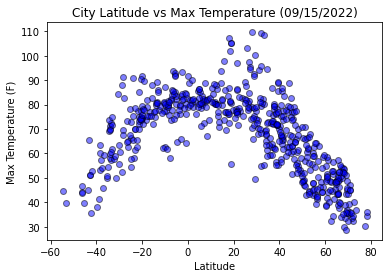

In [7]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The temperature ")


## Latitude vs. Humidity Plot

The higher the latitude the more humid it is.


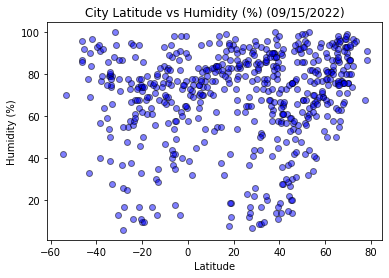

In [8]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The higher the latitude the more humid it is.")

## Latitude vs. Cloudiness Plot

There is no relationship between Latitude and Cloudiness


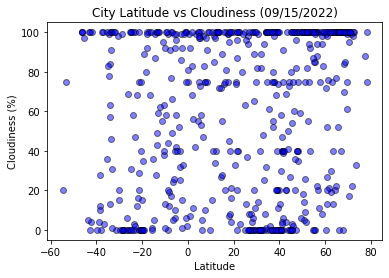

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("There is no relationship between Latitude and Cloudiness")

## Latitude vs. Wind Speed Plot

There is no relationship between wind and Latitude


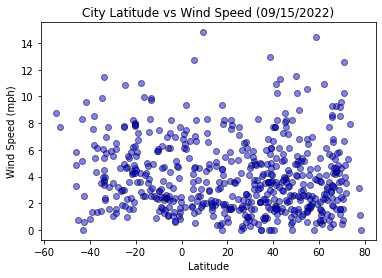

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("There is no relationship between wind and Latitude")

## Linear Regression

In [11]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.7x + 94.36
The r-squared is: -0.8126754713093738
There is a negative correlation.
The tempreture is lower in the nothern hemisphere.


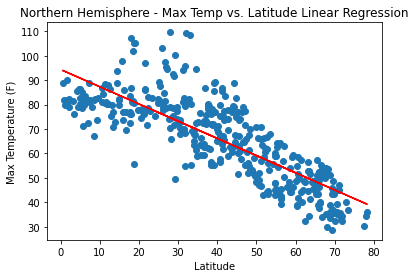

In [12]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is a negative correlation.")
print("The tempreture is lower in the nothern hemisphere.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.74x + 86.81
The r-squared is: 0.7412543421186552
There is a positive correlation.
The temperature rises as you get closer to the equator.


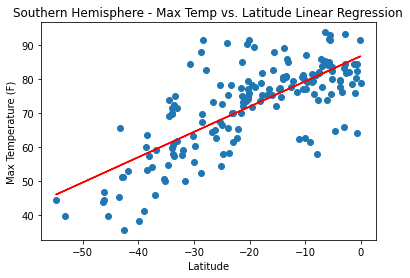

In [13]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is a positive correlation.")
print("The temperature rises as you get closer to the equator.")
plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.15x + 64.48
The r-squared is: 0.13956815931655556
There is no correlation.


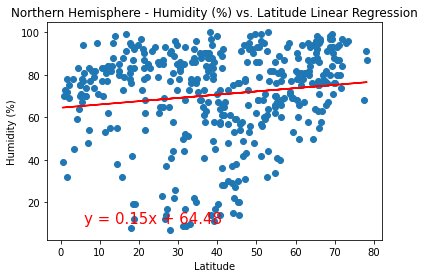

In [14]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is no correlation.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.1x + 63.54
The r-squared is: -0.060019237895030594
No correlation.


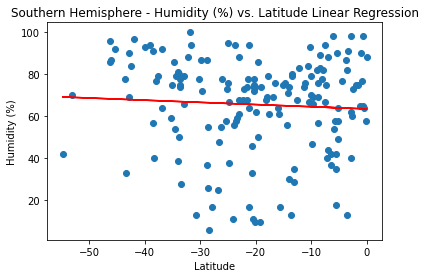

In [15]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("No correlation.")
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 53.02
The r-squared is: 0.046591285221774255
Ther is no relationship .


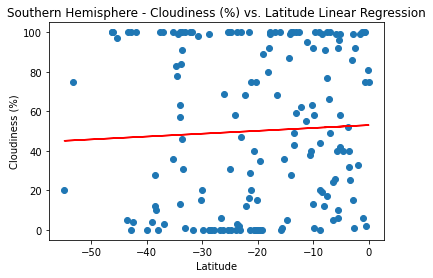

In [16]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("Ther is no relationship .")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 53.02
The r-squared is: 0.046591285221774255
No correlation.


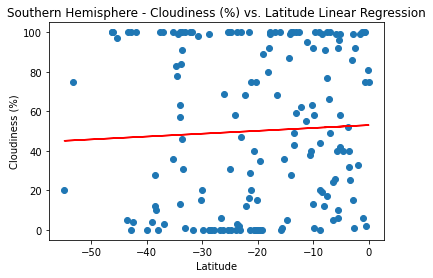

In [17]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("No correlation.")
plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.0x + 3.8
The r-squared is: -0.001379123087485528
There is no relationship between the two.


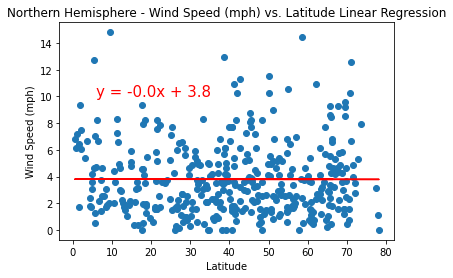

In [18]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is no relationship between the two.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 3.56
The r-squared is: -0.19064373202784887
There is no relationship.


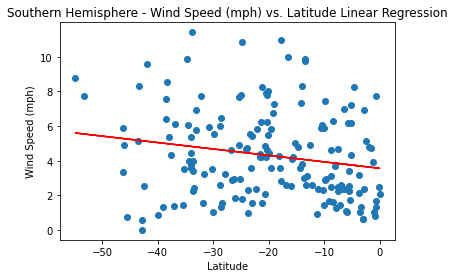

In [19]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("There is no relationship.")
plt.show()